In [2]:
# installing required libraries
!pip install astroplan
!pip3 install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 KB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for astroplan: filename=astroplan-0.8-py3-none-any.whl size=83275 sha256=59a480bc214496579d0e96964dbac7471b1514c4643e4872b7c097742f924a8a
  Stored in directory: /root/.cache/pip/wheels/cd/87/42/4cf5673b77f4570603bcbdf176c0b313b8ad8e9b83b23039cc
Successfully built astroplan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 81.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [1]:
# FRB data simulation and plotting code
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import os

from astroplan import Observer
##########################

def getdata(num, seed):

    n=num #Number of sources/data points to be generated
    s=seed  #seed value for random
    ##################################

    #Generating various parameters
    #print("Simulaiting data...")
    np.random.seed(s)
    RA=np.random.uniform(0, 359.999, n)
    Dec=np.random.uniform(-90, 89.999, n)
    period=np.random.uniform(1, 200, n) #period in days
    d_cycle=np.random.uniform(0.01,0.499, n) #duty cycle  
    s_phase=np.random.uniform(0, 0.999, n) #start phase
    name=[("sample_%d_%d"%(s,i)) for i in range(n)]
    ##############################

    #Coverting into DataFrame and saving as CSV file
    #print("Saving data...")
    val = list(zip(name,RA, Dec,period,d_cycle,s_phase)) 
    df = pd.DataFrame(val, columns=['Name','RA', 'Dec','Period','Duty_cycle','phase'])
    outdir = 'simulated_data_ORT'
    if not os.path.exists(outdir):
        os.mkdir(outdir)
    #df.to_csv("simulated_frb(%d,%d).csv"%(n,s))
    df.to_csv(f"{outdir}/simulated_frbs(%d,%d).csv"%(n,s))
    print("Data file saved successfully")
    return(df)
###############################

def plot(data):
    #plotting frbs ins sky
    resp= input("Do you want to visualize distribution of simulated FRB sources in sky? [Y/N]: ")
    resp=resp.upper()
    if resp=='Y':

        RA=data.RA
        Dec=data.Dec
        
        plt.scatter(RA,Dec,s=0.5)
        plt.title("FRBs in sky")
        plt.xlabel('RA')
        plt.xticks(range(0, 360,60))
        plt.ylabel('Dec')
        plt.yticks(range(-90, 90,20))
        plt.grid()
        plt.show()

        # change for optimization (remove append using for with direct numpy operation)
        RA[RA > 180] = RA[RA > 180] - 360
        RA_rad=np.deg2rad(RA)
        Dec_rad=np.deg2rad(Dec)
        
        
        #degress into radians, required for projection
        # for i in range(len(RA)):
        #     RA_rad.append(np.deg2rad(RA[i]))
        #     Dec_rad.append(np.deg2rad(Dec[i]))

        fig = plt.figure(figsize = (6,6))
        #changed subplot 111 to 221
        ax = fig.add_subplot(221, projection='mollweide')
        ax.scatter(RA_rad, Dec_rad, s=1, marker='o', color='b')
        ax.grid(True) 
        plt.title('FRBs in sky')
        plt.xlabel('RA')
        plt.ylabel('Dec')
        plt.show()
        
    else:
        print("Invalid input")

Dataset: 1
Data file saved successfully


<ipython-input-6-1663b9c973d7>:93: RuntimeWarning: invalid value encountered in arccos
  az= np.arccos((np.sin(dec[j]) - np.sin(alt)*np.sin(lat))/(np.cos(alt)*np.cos(lat)))


Do you want to visualize distribution of simulated FRB sources in sky? [Y/N]: Y


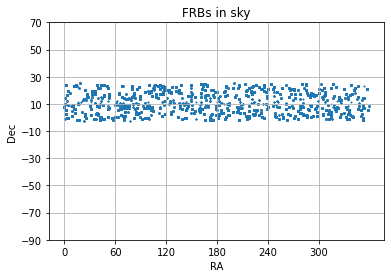

<ipython-input-2-683c8efda348>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RA[RA > 180] = RA[RA > 180] - 360


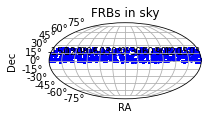

Observed data file saved successfully
For saving data: 13.26909327507019 seconds
For One 2 years run: 394.71124291419983 seconds
Dataset: 2
Data file saved successfully


<ipython-input-6-1663b9c973d7>:93: RuntimeWarning: invalid value encountered in arccos
  az= np.arccos((np.sin(dec[j]) - np.sin(alt)*np.sin(lat))/(np.cos(alt)*np.cos(lat)))


Do you want to visualize distribution of simulated FRB sources in sky? [Y/N]: Y


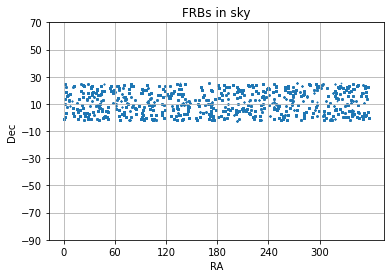

<ipython-input-2-683c8efda348>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RA[RA > 180] = RA[RA > 180] - 360


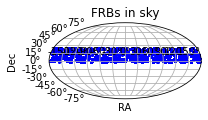

Observed data file saved successfully
For saving data: 13.532166004180908 seconds
For One 2 years run: 397.054719209671 seconds
Dataset: 3
Data file saved successfully
Do you want to visualize distribution of simulated FRB sources in sky? [Y/N]: Y


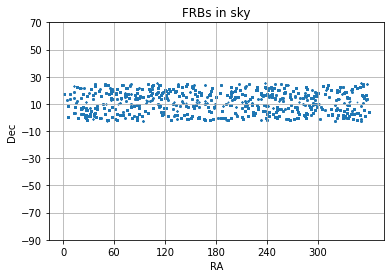

<ipython-input-2-683c8efda348>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RA[RA > 180] = RA[RA > 180] - 360


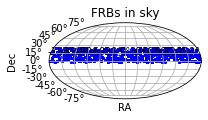

Observed data file saved successfully
For saving data: 12.251473426818848 seconds
For One 2 years run: 379.32392144203186 seconds
Dataset: 4
Data file saved successfully


<ipython-input-6-1663b9c973d7>:93: RuntimeWarning: invalid value encountered in arccos
  az= np.arccos((np.sin(dec[j]) - np.sin(alt)*np.sin(lat))/(np.cos(alt)*np.cos(lat)))


Do you want to visualize distribution of simulated FRB sources in sky? [Y/N]: Y


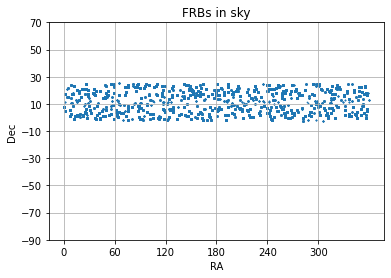

<ipython-input-2-683c8efda348>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RA[RA > 180] = RA[RA > 180] - 360


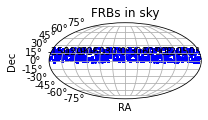

Observed data file saved successfully
For saving data: 13.257020711898804 seconds
For One 2 years run: 398.14992451667786 seconds
Dataset: 5
Data file saved successfully


<ipython-input-6-1663b9c973d7>:93: RuntimeWarning: invalid value encountered in arccos
  az= np.arccos((np.sin(dec[j]) - np.sin(alt)*np.sin(lat))/(np.cos(alt)*np.cos(lat)))


Do you want to visualize distribution of simulated FRB sources in sky? [Y/N]: Y


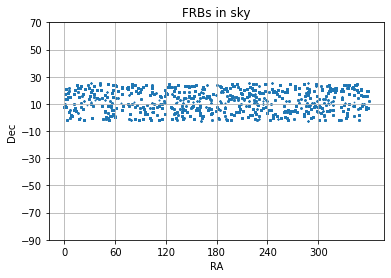

<ipython-input-2-683c8efda348>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RA[RA > 180] = RA[RA > 180] - 360


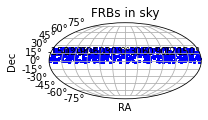

Observed data file saved successfully
For saving data: 12.326771974563599 seconds
For One 2 years run: 397.77538323402405 seconds


In [ ]:
# Code to Generate FRB Data and Observe it Using the Observer Object of a Telescope
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import astropy.units as u
from astropy.time import Time
from astroplan import Observer
import warnings
import time
import gc
#new imports

# #user defined file
# import simulate

n= 4100 #number of repeating FRBs
ndatasets= 5 #Number of Datasets to be generated, saved, and analysed
ndays= 2*365 #Number of observation days for a given dataset

R= Time('2000-01-01T12:00:00') #reference epoch
ort= Observer(longitude=76.666*u.deg, latitude=11.384*u.deg,elevation=0*u.m, name="ORT")
lat= ort.location.lat.rad #ORT Latitude in radian

#Beam ellipse, x and y are points to check
a= 1.75/2 #semi-minor axis
b= 27.4/2 #Semi-major axis
h= 180 #center point az
k= 90 #center point alt
h2= 0
k2= 90
h3= 360
k3= 90

for nd in range(ndatasets): #range of seed values, one can put a perticular range as well eg. range(5,10)

    st = time.time()
    print("Dataset: %d"%(nd+1))
    #make sure that getdata method definition is executed in above cell before running this code
    data=getdata(n, nd+1) #n= number of FRBs, i+1 = Seed for random numbers
    
    data.drop(data[data['Dec'] <= -20].index, inplace=True) #below declination -20 is outside the CHIME/FRB field of view
    data= data.reset_index(drop=True) #reindexing

    RA=data.RA
    Dec=data.Dec
    phs=data.phase #start phase
    P=data.Period
    D= data.Duty_cycle

    obs_frbs=[] #Observed FRBs
    ent= []
    ext= []
    new_phs=[]
    # added for plotting Alt-Az for FRB (for running this first comment the plot(obs_frbs) then run it)
    # plt.title("Alt-Az plot for FRBs 2 days and for 20 FRB perdataset") # this is done for clarity of plot 
    # plt.ylabel('Azimuth [deg]')
    # plt.xlabel('Altitude [deg]')
   
    for i in range(ndays):
        
        #print("Day:",i)
        T= Time('2018-01-01T12:00:00') #time T
        T= T+i*u.day
        
        P=data.Period #start phase
        
        new_phs= ((T.mjd-R.mjd)%P)/P
        
        x1= new_phs<=0.5+0.5*D
        x2= new_phs>=0.5-0.5*D
        x= x1 & x2
        Act_frbs= data[x] #Active FRBs
        Act_frbs= Act_frbs.reset_index(drop=True)
           
        start= T
        end= T+1*u.day
        twin= start + (end - start) * np.linspace (0, 1, 1440) # Observing every minute
        
        ra= Act_frbs.RA
        dec= np.deg2rad(Act_frbs.Dec) #in radians
        lst= ort.local_sidereal_time(twin.value).deg
        my_saa= []

        #Converting Equatorial (RA-Dec) into horizontal (Alt-Az) coordinates for ORT
        for j in range(len(ra)): #loop to calculate for each source

            ha= np.deg2rad(lst-ra[j])

            #if HA value is in negative, add 360 to it
            ha[np.where(ha<=0)]+= 2*np.pi

            alt= np.arcsin(np.sin(dec[j])*np.sin(lat) + np.cos(dec[j])*np.cos(lat)*np.cos(ha))
            az= np.arccos((np.sin(dec[j]) - np.sin(alt)*np.sin(lat))/(np.cos(alt)*np.cos(lat)))   
        
            alt= np.rad2deg(alt)
            az= np.rad2deg(az)
        
            #if sin(HA) is positve, subtract az from 360
            m= np.sin(ha)>0
            az[m]= 360-az[m]

            my_saa.append([alt, az])
            # if (i<2 and j<20):
            #     plt.plot(alt,az)
            
                

        #Determining active FRBs passing through beam region, and when (entry and exit time) 
        for m in range(len(my_saa)):
        
            x= my_saa[m][1]
            y= my_saa[m][0]
            r= (pow((x - h), 2) / pow(a, 2)) + (pow((y - k), 2) / pow(b, 2)); 
            #r<1 inside, r=1 on the ellipse, r>1 outside
            r= r<=1 
            r2 = (pow((x - h2), 2) / pow(a, 2)) + (pow((y - k2), 2) / pow(b, 2)); 
            r2= r2<=1
            r3 = (pow((x - h3), 2) / pow(a, 2)) + (pow((y - k3), 2) / pow(b, 2)); 
            r3= r3<=1
            r2+= r3
            r+= r2
            if r.sum()>=1: #checking if at any point passes through beam region
                dr= np.diff(r, prepend=0) #differentiating and adding 0 in front.
                sp= np.where(dr!=0)[0] #checking change in values, from true to false or vice versa.
                if len(sp)%2!=0:
                    sp= np.append(sp, sp[-1]+1) #adding value to make it even
                    sp= sp.reshape((-1, 2))
                    [ent.append( start+ ((end - start) * (l/len(twin))) ) for l in sp[:,0]]
                    [ext.append( start+ ((end - start) * (l/len(twin))) ) for l in sp[:,1]]
                    for l in range(len(sp)): obs_frbs.append(Act_frbs.iloc[m])
                else:
                    sp= sp.reshape((-1, 2)) #dividing in entry and exit
                    [ent.append( start+ ((end - start) * (l/len(twin))) ) for l in sp[:,0]]
                    [ext.append( start+ ((end - start) * (l/len(twin))) ) for l in sp[:,1]]
                    for l in range(len(sp)): obs_frbs.append(Act_frbs.iloc[m])#indexing is same for Act_frbs

    obs_frbs= pd.DataFrame(obs_frbs)
    obs_frbs= obs_frbs.reset_index(drop=True)
    #plotting the observed frbs in sky (run this by commenting Alt-Az plot)
    plot(obs_frbs)
    #Saving all observed frbs in file
    outdir = '/Observed_FRBs_Vanilla_ORT'
    if not os.path.exists(outdir):
        os.mkdir(outdir)

    st2 = time.time()
    #Adding entry and exit times into dataframe obs_frbs
    obs_frbs= pd.concat([obs_frbs, pd.DataFrame(ent, columns=["Entry_time"]), pd.DataFrame(ext, columns=["Exit_time"])], axis = 1)
    
    #df.to_csv(f"{outdir}/observed_frbs(%s).csv"%(nd+1)) #saving as csv file
    np.savetxt(f"{outdir}/observed_frbs(%s).csv"%(nd+1), obs_frbs.values, fmt='%s,%.6f,%.6f,%.6f,%.6f,%.6f,%s,%s', header=','.join(obs_frbs.columns), comments='')
    print("Observed data file saved successfully")

    print(f'For saving data: {time.time() - st2} seconds')
    print(f'For One 2 years run: {time.time() - st} seconds')

    del obs_frbs
    del my_saa
    gc.collect()
    plt.show()

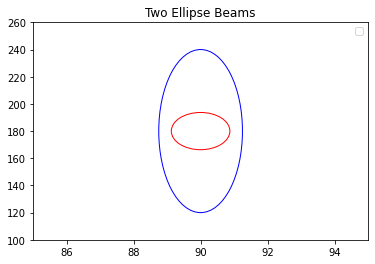

In [22]:
# Code for printing ellipse beams of both telescopes (for seeing the beam size difference)
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# create figure and axis objects
fig, ax = plt.subplots()

# set axis limits
ax.set_xlim(0, 360)
ax.set_ylim(-90, 90)

# plot first ellipse
ort_beam = Ellipse((90, 180), width=1.75, height=27.4, angle=0, edgecolor='r', facecolor='none', label='ORT beam')
ax.add_artist(ort_beam)

# plot second ellipse
chime_beam = Ellipse((90, 180), width=2.5, height=120, angle=0, edgecolor='b', facecolor='none', label='Chime beam')
ax.add_artist(chime_beam)

# add legend to the plot
ax.legend()




# Set the limits of the plot
ax.set_xlim(85, 95)
ax.set_ylim(100,260)

# Add title and labels
ax.set_title("Two Ellipse Beams")


plt.show()
